# Filmanalyse mit Pandas
## Einsteigerprojekt
Willkommen zu eurem ersten Pandas-Projekt! In diesem Notebook werden wir einen Datensatz mit Film- und Serieninformationen analysieren. Ziel ist es, die Grundlagen von Pandas zu lernen, Daten zu bereinigen, erste Analysen durchzuführen und Ergebnisse zu visualisieren.

### 1. Bibliotheken importieren
Zuerst importieren wir die notwendigen Bibliotheken: pandas für die Datenmanipulation und matplotlib.pyplot sowie seaborn für die Visualisierung.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Einstellungen für schönere Plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Standardgröße für Diagramme
plt.rcParams['figure.dpi'] = 100 # Höhere Auflösung für Diagramme

### 2. Daten laden
Wir laden den Datensatz aus einer CSV-Datei in einen Pandas DataFrame. Stellt sicher, dass die netflix.csv-Datei im selben Verzeichnis wie euer Notebook liegt, oder passt den Pfad entsprechend an.

In [9]:
# Pfad zur CSV-Datei
file_path = 'netflix.csv' # Annahme: Datei liegt im selben Ordner

# DataFrame erstellen
df = pd.read_csv(file_path)

print(f"Datensatz erfolgreich geladen. Anzahl der Zeilen: {df.shape[0]}, Anzahl der Spalten: {df.shape[1]}")

Datensatz erfolgreich geladen. Anzahl der Zeilen: 8807, Anzahl der Spalten: 12


### 3. Daten erkunden: Erster Überblick
Schauen wir uns die ersten und letzten Zeilen des DataFrames an und erhalten einen Überblick über Datentypen und fehlende Werte.
Aber bevor wie loslegen werden wir unseren Datensatz einmal kopieren. Das erleichtert uns später bei unseren ersten Gehversuchen die Arbeit. Wir behalten also immer den originalen Datensatz und arbeiten auf der Kopie. Kannst Du Dir vorstellen warum das sinnvoll ist?

In [10]:
df_original = df.copy()

In [11]:
print("Erste 5 Zeilen des DataFrames:")
df.head()

Erste 5 Zeilen des DataFrames:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
print("\nLetzte 5 Zeilen des DataFrames:")
df.tail()


Letzte 5 Zeilen des DataFrames:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#### Bestimmte Spalten anzeigen
Wir können uns auch nur ausgewählte Spalten ansehen.

In [13]:
print("\nAnzeige der Spalten 'title', 'type', 'release_year':")
df[['title', 'type', 'release_year']].head()


Anzeige der Spalten 'title', 'type', 'release_year':


,title,type,release_year
0,Dick Johnson Is Dead,Movie,2020
1,Blood & Water,TV Show,2021
2,Ganglands,TV Show,2021
3,Jailbirds New Orleans,TV Show,2021
4,Kota Factory,TV Show,2021


#### Allgemeine Informationen (.info())
df.info() gibt uns einen schnellen Überblick über die Spalten, deren Datentypen und die Anzahl der nicht-null-Werte. Das ist super wichtig, um fehlende Daten zu identifizieren.

In [14]:
print("\nAllgemeine Informationen zum DataFrame:")
df.info()


Allgemeine Informationen zum DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Statistische Zusammenfassung für numerische Spalten (.describe())
df.describe() liefert statistische Kennzahlen (Mittelwert, Median, Quartile etc.) für alle numerischen Spalten.

In [15]:
print("\nStatistische Zusammenfassung der numerischen Spalten:")
df.describe()


Statistische Zusammenfassung der numerischen Spalten:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 4. Datenbereinigung (Cleansing)
Daten sind selten perfekt! Hier kümmern wir uns um fehlende Werte und passen Datentypen an.

#### Fehlende Werte behandeln
- **director, cast, country** Wir ersetzen fehlende Werte durch 'Unbekannt', da wir diese Informationen nicht einfach erraten können.
- **date_added**: Für die Analyse des Hinzufügedatums sind vollständige Daten wichtig. Wir löschen Zeilen, in denen date_added fehlt.
- **rating**: Hier gibt es nur sehr wenige fehlende Werte. Wir könnten sie löschen, aber für dieses Projekt füllen wir sie mit dem häufigsten Wert (mode) auf, um sie nicht zu verlieren.

In [16]:
# 'director', 'cast', 'country' mit 'Unbekannt' füllen
df['director'] = df['director'].fillna('Unbekannt')
df['cast'] = df['cast'].fillna('Unbekannt')
df['country'] = df['country'].fillna('Unbekannt')

# Zeilen mit fehlenden 'date_added' Werten löschen
df = df.dropna(subset=['date_added'])

# 'rating' mit dem häufigsten Wert füllen (mode)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Ausgabe
print(df_original.isnull().sum())
print('-' * 20)
print(df.isnull().sum(), "\n")

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
--------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64 



### Datentypen anpassen

Die Spalte **date_added** sollte als Datumstyp gespeichert werden, damit wir damit rechnen können.

In [17]:
# Konvertieren Sie die Spalte 'date_added' zu datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Jetzt können Sie die .dt Methoden verwenden
df['date_added_formatted'] = df['date_added'].dt.strftime('%B %d, %Y')

print("\nDatentypen nach der Anpassung von 'date_added':")
df.info()



Datentypen nach der Anpassung von 'date_added':
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8797 non-null   object        
 1   type                  8797 non-null   object        
 2   title                 8797 non-null   object        
 3   director              8797 non-null   object        
 4   cast                  8797 non-null   object        
 5   country               8797 non-null   object        
 6   date_added            8709 non-null   datetime64[ns]
 7   release_year          8797 non-null   int64         
 8   rating                8797 non-null   object        
 9   duration              8794 non-null   object        
 10  listed_in             8797 non-null   object        
 11  description           8797 non-null   object        
 12  date_added_formatted  8709 non-n

#### Neue Spalte für das Hinzufügejahr erstellen
Da date_added nun ein Datumstyp ist, können wir das Jahr einfach extrahieren.

In [18]:
df['added_year'] = df['date_added'].dt.year

print("\nErste Zeilen mit der neuen Spalte 'added_year':")
df[['date_added', 'added_year']].head()


Erste Zeilen mit der neuen Spalte 'added_year':


,date_added,added_year
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


#### Duplikate entfernen
Überprüfen wir, ob es doppelte Einträge im Datensatz gibt und entfernen diese, basierend auf 'title' und 'type'.

In [19]:
initial_rows = df.shape[0]
df.drop_duplicates(subset=['title', 'type'], inplace=True)
print(f"\nAnzahl der entfernten Duplikate: {initial_rows - df.shape[0]}")
print(f"Neue Anzahl der Zeilen nach Duplikatsentfernung: {df.shape[0]}")


Anzahl der entfernten Duplikate: 0
Neue Anzahl der Zeilen nach Duplikatsentfernung: 8797


## 5. Datenanalyse (Analytic)
Jetzt, da unsere Daten sauber sind, können wir spannende Fragen beantworten!

#### 5.1 Verteilung von Filmen und Serien
Wie viele Filme und Serien sind im Datensatz enthalten?

In [21]:
type_counts = df['type'].value_counts()
print("\nAnzahl der Filme und Serien:")
print(type_counts)


Anzahl der Filme und Serien:
type
Movie      6131
TV Show    2666
Name: count, dtype: int64


#### Ergebnis plotten
Ein kleiner Vorgriff auf das was später kommt...;-)

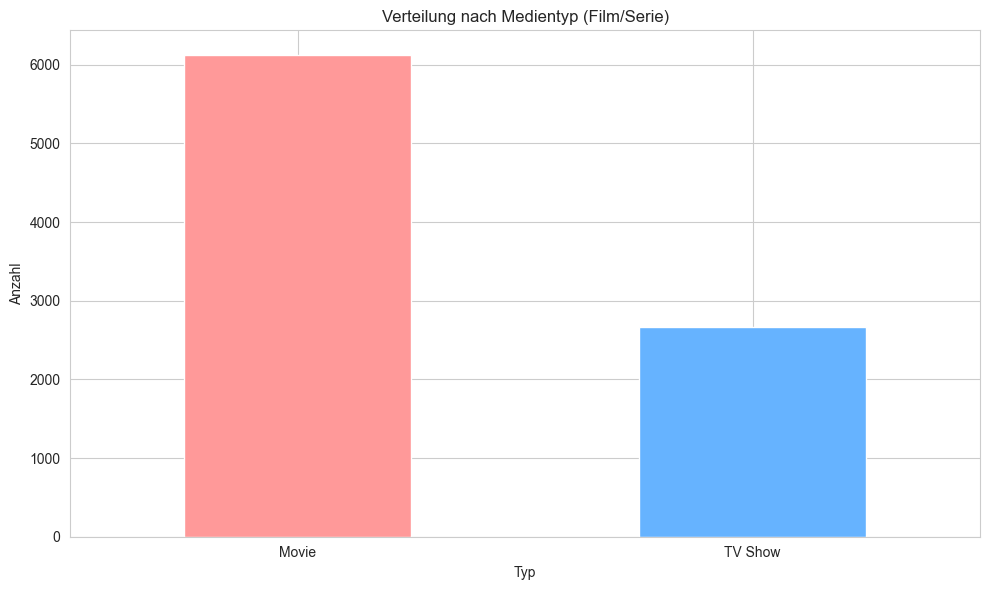

In [22]:
# Direktes Plotten mit pandas
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['#ff9999', '#66b3ff'])

# Diagramm anpassen
plt.title('Verteilung nach Medientyp (Film/Serie)')
plt.xlabel('Typ')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)  # Beschriftungen horizontal

# Anzeigen
plt.tight_layout()
plt.show()


#### 5.2 Die Top 10 Regisseure
Wer hat die meisten Titel inszeniert?

In [23]:
# Annahme: 'Unbekannt' ist hier kein relevanter Regisseur für die Top-Liste
top_directors = df[df['director'] != 'Unbekannt']['director'].value_counts().head(10)
print("\nTop 10 Regisseure nach Anzahl der Titel:")
print(top_directors)


Top 10 Regisseure nach Anzahl der Titel:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


#### 5.3 Die Top 10 Genres (listed_in)
Welche Genres sind am häufigsten vertreten? Hier müssen wir beachten, dass ein Titel mehrere Genres haben kann.

In [24]:
# Splitten der Genres und Zählen der Häufigkeiten
all_genres = df['listed_in'].apply(lambda x: [s.strip() for s in x.split(',')]).explode()
top_genres = all_genres.value_counts().head(10)

print("\nTop 10 Genres nach Anzahl der Titel:")
print(top_genres)


Top 10 Genres nach Anzahl der Titel:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


#### 5.4 Entwicklung der Veröffentlichungen über die Jahre
Wie viele Titel wurden pro release_year veröffentlicht?

In [25]:
releases_per_year = df['release_year'].value_counts().sort_index()
print("\nAnzahl der Veröffentlichungen pro Jahr (Top 10 und letzte 5):")
print(releases_per_year.head(10)) # Die ersten 10 Jahre
print("...")
print(releases_per_year.tail(5))  # Die letzten 5 Jahre


Anzahl der Veröffentlichungen pro Jahr (Top 10 und letzte 5):
release_year
1925    1
1942    2
1943    3
1944    3
1945    4
1946    2
1947    1
1954    2
1955    3
1956    2
Name: count, dtype: int64
...
release_year
2017    1032
2018    1146
2019    1030
2020     953
2021     592
Name: count, dtype: int64


#### 5.5 Die Top 10 Länder
Aus welchen Ländern stammen die meisten Titel?

In [26]:
# Länder können auch kommagetrennt sein
all_countries = df[df['country'] != 'Unbekannt']['country'].apply(lambda x: [s.strip() for s in x.split(',')]).explode()
top_countries = all_countries.value_counts().head(10)

print("\nTop 10 Länder nach Anzahl der Titel:")
print(top_countries)


Top 10 Länder nach Anzahl der Titel:
country
United States     3684
India             1046
United Kingdom     805
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


## 6. Visualisierung
Visualisierungen helfen uns, die Erkenntnisse aus den Daten besser zu verstehen und zu kommunizieren.

#### 6.1 Verteilung von Filmen und Serien

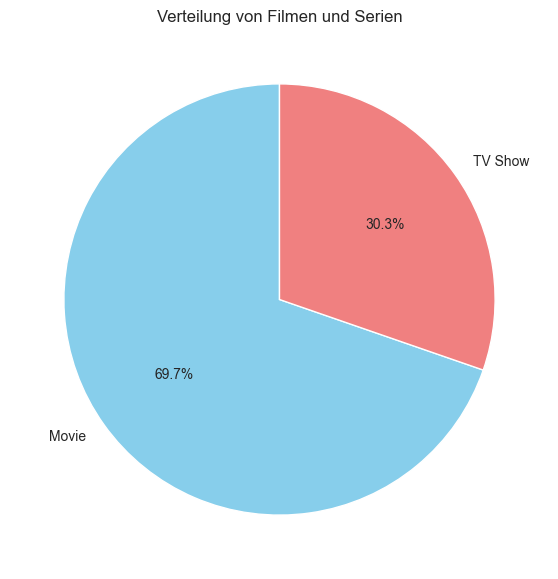

In [27]:
plt.figure(figsize=(7, 7))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Verteilung von Filmen und Serien')
plt.ylabel('') # Entfernt das "type" Label auf der Y-Achse
plt.show()

#### 6.2 Top 10 Genres

/var/folders/ct/24qvw01n11d3qbzsdjq4bykw0000gn/T/ipykernel_26787/3623446369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


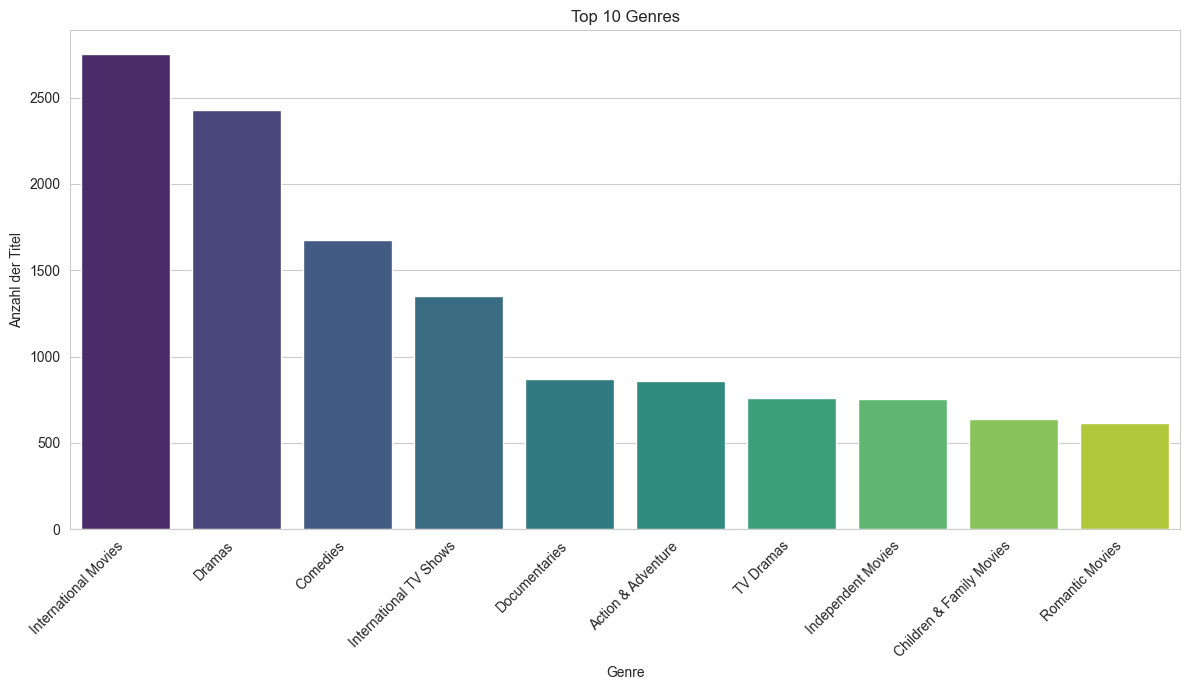

In [29]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Anzahl der Titel')
plt.xticks(rotation=45, ha='right') # Labels besser lesbar machen
plt.tight_layout()
plt.show()

#### 6.3 Titel-Veröffentlichungen über die Jahre

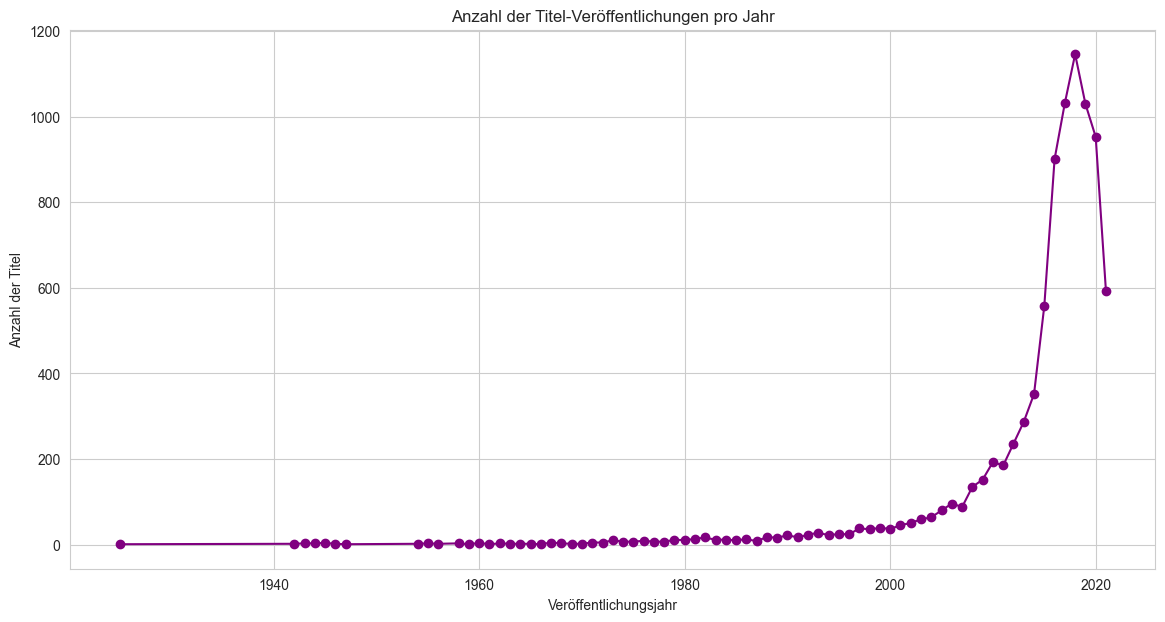

In [30]:
plt.figure(figsize=(14, 7))
releases_per_year.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Anzahl der Titel-Veröffentlichungen pro Jahr')
plt.xlabel('Veröffentlichungsjahr')
plt.ylabel('Anzahl der Titel')
plt.grid(True)
plt.show()

#### 6.4 Top 10 Länder

/var/folders/ct/24qvw01n11d3qbzsdjq4bykw0000gn/T/ipykernel_26787/174703016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='plasma')


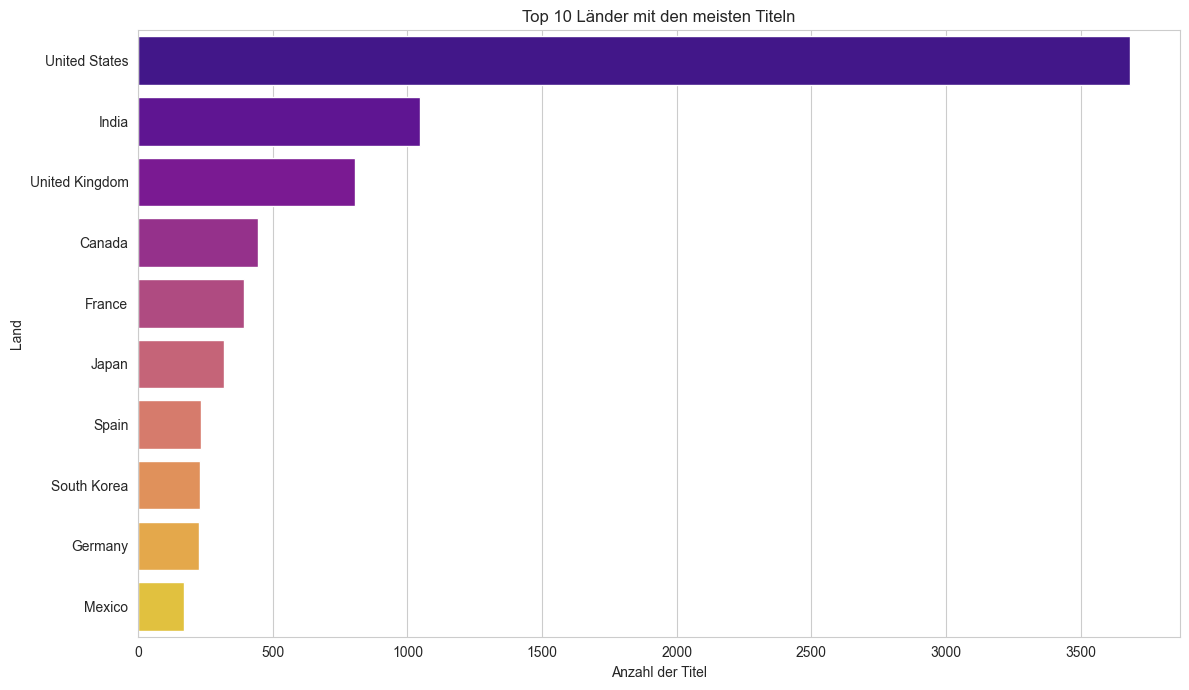

In [31]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='plasma')
plt.title('Top 10 Länder mit den meisten Titeln')
plt.xlabel('Anzahl der Titel')
plt.ylabel('Land')
plt.tight_layout()
plt.show()

### 6.5 Unterschiedliche Diagramme
Betrachte folgenden Code (den hatten wir schon in 5.1)
```Python
type_counts = df['type'].value_counts()
print("\nAnzahl der Filme und Serien:")
print(type_counts)
```
Lasst uns die Verteilung in unterschiedlichen Diagrammen visualisieren

#### 6.5.1 Option 1: Einfaches Balkendiagramm mit Pandas


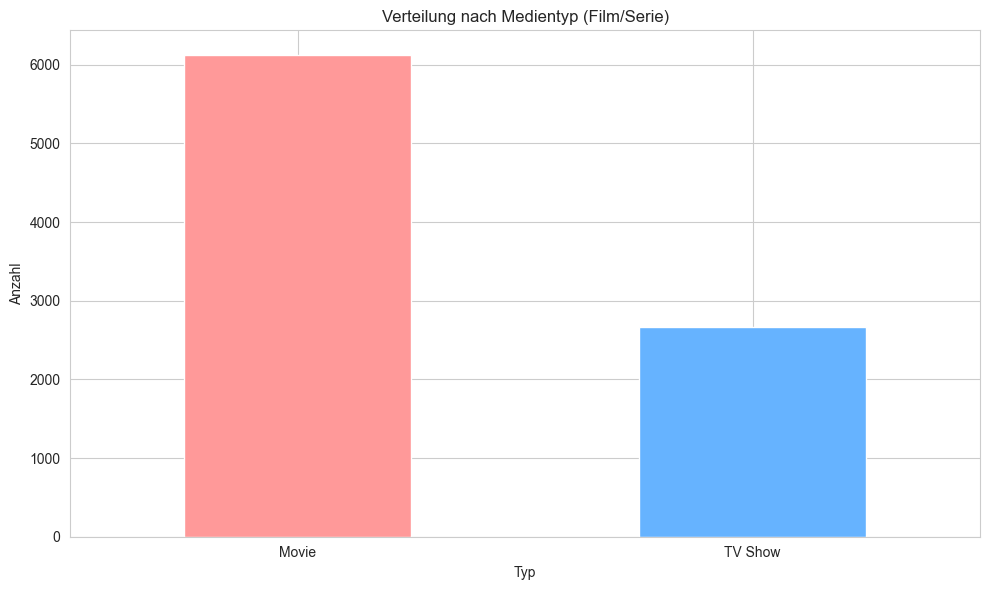

In [32]:
# Direktes Plotten mit pandas
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['#ff9999', '#66b3ff'])

# Diagramm anpassen
plt.title('Verteilung nach Medientyp (Film/Serie)')
plt.xlabel('Typ')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)  # Beschriftungen horizontal

# Anzeigen
plt.tight_layout()
plt.show()


#### 6.5.2 Option 2: Kreisdiagramm (Pie Chart)


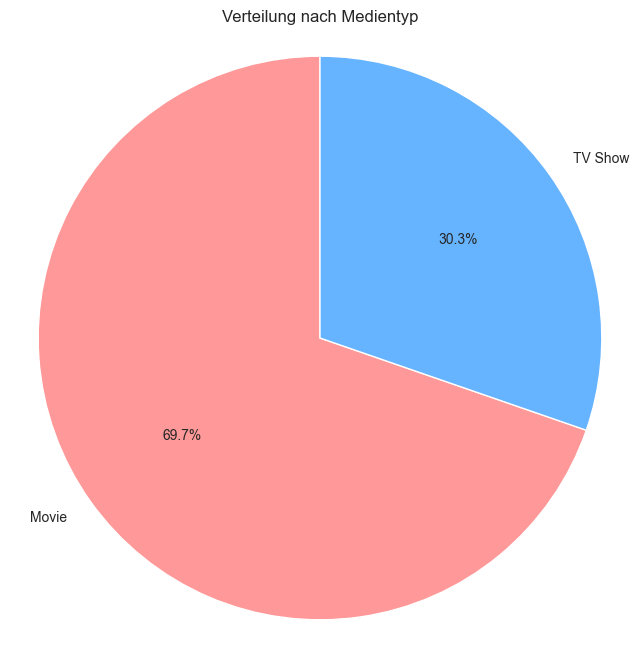

In [33]:
# Kreisdiagramm erstellen
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')  # Kreis statt Ellipse
plt.title('Verteilung nach Medientyp')
plt.show()


#### 6.5.3 Option 3: Seaborn-Countplot (elegantere Lösung)


/var/folders/ct/24qvw01n11d3qbzsdjq4bykw0000gn/T/ipykernel_26787/3978356788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


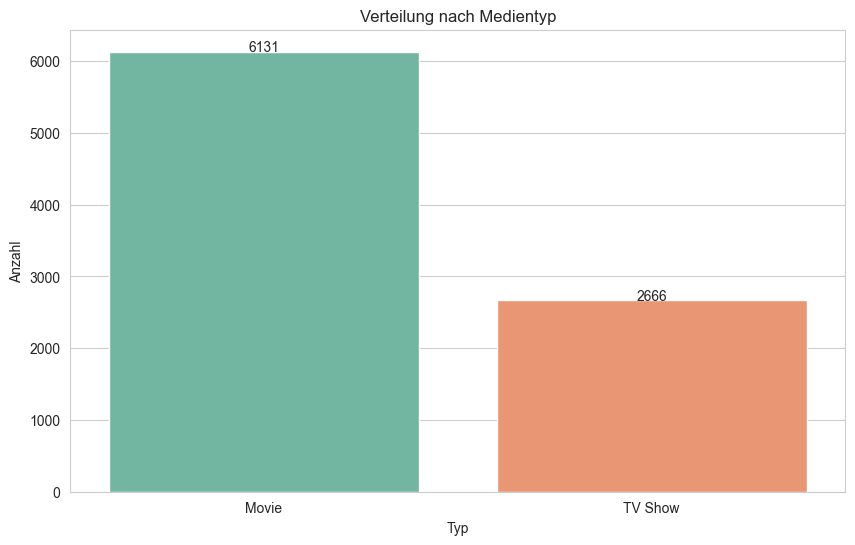

In [34]:
# Mit Seaborn erstellen (erzeugt automatisch value_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Set2')

# Diagramm anpassen
plt.title('Verteilung nach Medientyp')
plt.xlabel('Typ')
plt.ylabel('Anzahl')

# Werte über den Balken anzeigen
for i, count in enumerate(df['type'].value_counts()):
    plt.text(i, count + 5, f'{count}', ha='center')

plt.show()


#### 6.5.4 Horizontales Balkendiagramm

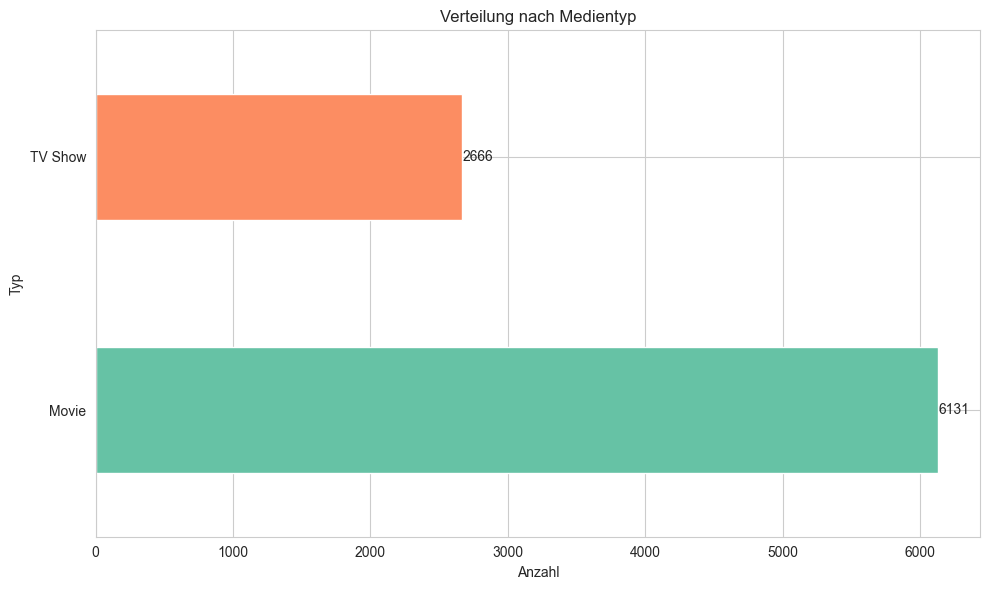

In [35]:
# Horizontales Balkendiagramm
type_counts = df['type'].value_counts()
type_counts.plot(kind='barh', color=sns.color_palette("Set2"))

plt.title('Verteilung nach Medientyp')
plt.xlabel('Anzahl')
plt.ylabel('Typ')

# Werte am Ende der Balken anzeigen
for i, count in enumerate(type_counts):
    plt.text(count + 5, i, f'{count}', va='center')

plt.tight_layout()
plt.show()


### Fazit und nächste Schritte
Ihr habt nun die ersten Schritte der Datenanalyse mit Pandas gemeistert! Ihr habt gelernt, Daten zu laden, zu bereinigen, grundlegende Analysen durchzuführen und die Ergebnisse zu visualisieren.

#### Mögliche weitere Schritte und Herausforderungen:

- Detailliertere Analyse der duration Spalte: Filmlaufzeiten analysieren (z.B. durchschnittliche Filmlänge).

- Analyse der rating Spalte: Wie verteilen sich die verschiedenen Altersfreigaben?

- Komplexere Textanalyse: Die description Spalte könnte für eine Wortanalyse verwendet werden (z.B. häufigste Schlüsselwörter).

- Interaktive Visualisierungen: Erkundet Bibliotheken wie Plotly oder Bokeh für interaktive Diagramme.

Viel Spaß beim weiteren Erkunden der Daten!